In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
from os import path
path = '/content/drive/MyDrive/CSV/Shopping_CustomerData (1).csv'
df = pd.read_csv(path)

df.describe()

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


In [28]:
df_new = df[["CustomerAge","SpendingScore"]]
df_new.describe()

,CustomerAge,SpendingScore
count,200.000000,200.00000
mean,45.520000,50.70500
std,16.113592,28.72269
min,18.000000,2.00000
25%,31.750000,27.75000
50%,46.500000,48.00000
75%,59.000000,77.00000
max,75.000000,100.00000


In [29]:
df_new.isnull().sum()

CustomerAge      0
SpendingScore    0
dtype: int64

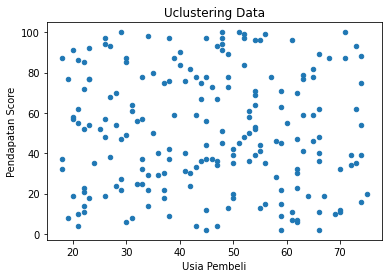

In [30]:
df.plot(kind='scatter', x='CustomerAge', y='SpendingScore')
plt.xlabel('Usia Pembeli')
plt.ylabel('Pendapatan Score')
plt.title('Uclustering Data')
plt.show()

In [31]:
k = 3
np.random.seed(40)

random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(1,100), np.random.randint(1,100)])
print('Randomly selected points as random_centroids:', random_centroids)

Randomly selected points as random_centroids: [[71, 92], [8, 38], [57, 51]]


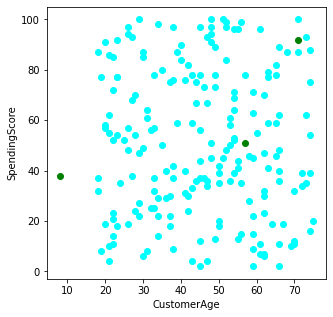

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
color1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i], color=color1[1])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.show()

In [33]:
def assignment(df_new,random_centroids):
  for i in range(length):
    df_new['Distance from Centroids {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))

  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroids 0'],df_new['Distance from Centroids 1'],df_new['Distance from Centroids 2']):
    d= min(a,b,c)

    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroids'] = list1
  df_new['Color']=list2
  return df_new

In [34]:
df_new = assignment(df_new, random_centroids)
df_new.head()

,CustomerAge,SpendingScore,Distance from Centroids 0,Distance from Centroids 1,Distance from Centroids 2,Closest_Centroids,Color
0,49,78,26.076810,57.280014,28.160256,0,r
1,59,63,31.384710,56.797887,12.165525,2,b
2,54,69,28.600699,55.470713,18.248288,2,b
3,42,30,68.447060,34.928498,25.806976,2,b
4,30,6,95.273291,38.832976,52.478567,1,g


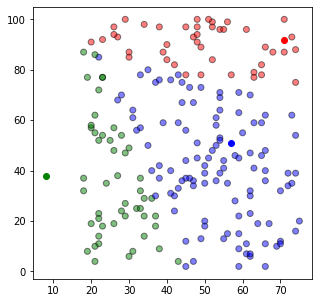

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color = df_new['Color'],alpha = 0.5,edgecolor= 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=color1[i])

In [36]:
def update(parameter):
  for i in range(length):
    random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroids'] == i]['CustomerAge'])
    random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroids'] == i]['SpendingScore'])
  return parameter

In [37]:
random_centroids = update(random_centroids)
random_centroids

[[49.16279069767442, 90.09302325581395],
 [26.387755102040817, 35.97959183673469],
 [52.75, 41.7037037037037]]

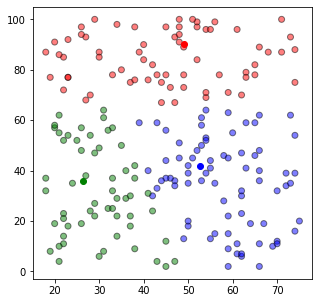

In [38]:
df_new = assignment(df_new,random_centroids)
df_new.head()
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color = df_new['Color'],alpha = 0.5,edgecolor= 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=color1[i])
plt.show()

In [39]:
count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid',old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)

  new_random_centroids = np.round(random_centroids)
  print('New Centroid',new_random_centroids)

  df_new = assignment(df_new, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)
  print(result)
  if result == True:
    break

  print(count)

Old Centroid [[49. 90.]
 [26. 36.]
 [53. 42.]]
New Centroid [[45. 85.]
 [30. 32.]
 [58. 35.]]
False
2
Old Centroid [[45. 85.]
 [30. 32.]
 [58. 35.]]
New Centroid [[45. 82.]
 [30. 31.]
 [59. 33.]]
False
3
Old Centroid [[45. 82.]
 [30. 31.]
 [59. 33.]]
New Centroid [[45. 82.]
 [31. 30.]
 [60. 32.]]
False
4
Old Centroid [[45. 82.]
 [31. 30.]
 [60. 32.]]
New Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
False
5
Old Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
New Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
True


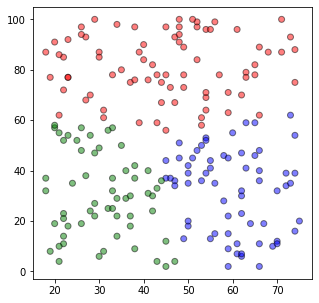

In [40]:
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color = df_new['Color'],alpha = 0.5,edgecolor= 'k')
plt.show()

In [41]:
df = df[["CustomerAge","SpendingScore"]]
df.head()

,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [42]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [43]:
labels = kmeans.predict(df)
labels

array([1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2,
       1, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 2], dtype=int32)

In [57]:
centroids = kmeans.cluster_centers_
centroids

array([[47.06756757, 47.05405405],
       [44.82089552, 84.65671642],
       [44.37288136, 16.72881356]])

In [58]:
kmeans.inertia_

69228.85879694519

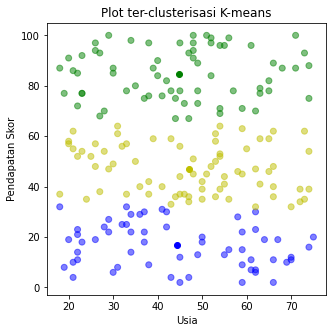

In [59]:
plt.figure(figsize=(5,5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)
plt.scatter(df['CustomerAge'],df['SpendingScore'], color=colors1, alpha=0.5)
for idx, centroids in enumerate(centroids):
  plt.scatter(*centroids, color=colmap[idx+1])
plt.xlabel('Usia')
plt.ylabel('Pendapatan Skor')
plt.title('Plot ter-clusterisasi K-means')
plt.show()

In [61]:
inertia_list = []
for num_clusters in np.arange(1,21):
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)

  inertia_list

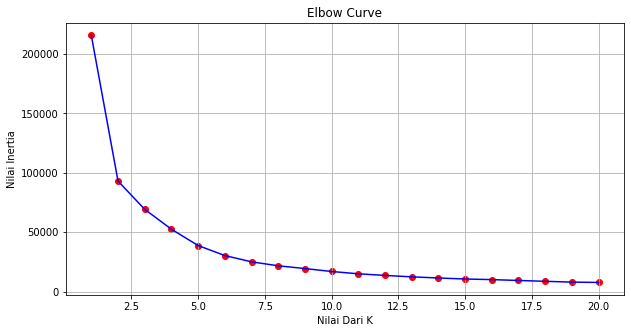

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('Nilai Dari K')
plt.ylabel('Nilai Inertia')
plt.title('Elbow Curve')
plt.show() 